<a href="https://colab.research.google.com/github/Lansmoke/PLP_ASSIGN/blob/main/Copy_of_decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the dataset
iris = load_iris()
X = iris.data    # Features (Sepal/Petal dimensions)
y = iris.target  # Target (Species: 0, 1, 2)
target_names = iris.target_names

print("Data loaded successfully.")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {target_names}")


Data loaded successfully.
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


Training set size: 105 samples
Testing set size: 45 samples


In [ ]:
# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

print("Decision Tree Model trained successfully.")


Decision Tree Model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
# Use 'weighted' average for multi-class metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n--- Decision Tree Classifier Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")

# Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))



--- Decision Tree Classifier Evaluation ---
Accuracy: 1.0000
Precision (Weighted): 1.0000
Recall (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1. Normalize and Reshape Images
# Normalize to [0, 1] and reshape to (28, 28, 1) for the CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# 2. Convert Labels to One-Hot Encoding
# e.g., the digit 5 becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("MNIST Data loaded and preprocessed for CNN.")
print(f"Input shape: {x_train.shape}")

MNIST Data loaded and preprocessed for CNN.
Input shape: (60000, 28, 28, 1)


In [ ]:
# Define the CNN model architecture
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Classification Head
    Flatten(), # Converts the 3D map into a 1D vector
    Dense(100, activation='relu'),
    Dense(10, activation='softmax') # Output layer: 10 units with softmax for probability distribution
])

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (5 epochs should be enough to exceed 95%)
print("\nStarting CNN Training...")
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Starting CNN Training...
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.8755 - loss: 0.4134 - val_accuracy: 0.9835 - val_loss: 0.0516
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9805 - loss: 0.0615 - val_accuracy: 0.9847 - val_loss: 0.0524
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9881 - loss: 0.0375 - val_accuracy: 0.9870 - val_loss: 0.0442
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9917 - loss: 0.0259 - val_accuracy: 0.9880 - val_loss: 0.0408
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.9878 - val_loss: 0.0455



--- CNN Evaluation ---
Test Accuracy: 98.95%
Goal achieved: Test accuracy is above 95%!
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step

Visualizing 5 random test predictions:


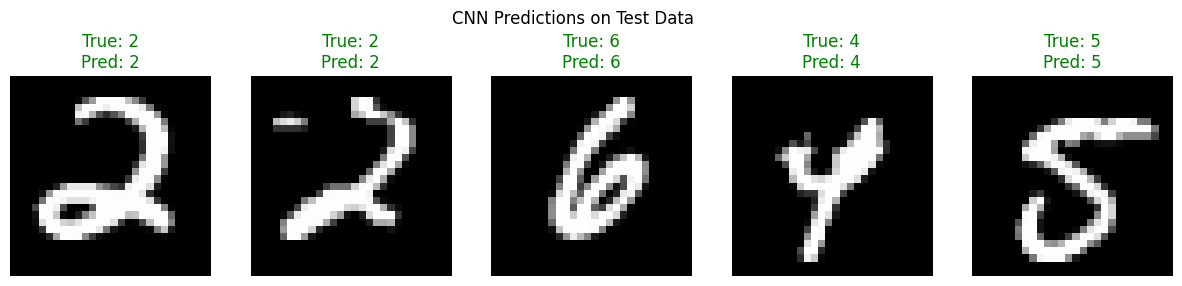

In [ ]:
# Evaluate the final performance on the test set
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n--- CNN Evaluation ---")
print(f"Test Accuracy: {acc * 100:.2f}%")

# Check if the goal was achieved
if acc > 0.95:
    print("Goal achieved: Test accuracy is above 95%!")
else:
    print("Goal not yet achieved. Try increasing epochs or adjusting the model.")


# Visualize 5 Predictions
predictions = model.predict(x_test)

# Select 5 random indices for visualization
indices = np.random.choice(len(x_test), 5, replace=False)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

print("\nVisualizing 5 random test predictions:")
for i, idx in enumerate(indices):
    image = x_test[idx].reshape(28, 28)

    # Retrieve the original label (integer form)
    # The true label is the index of the highest value in the one-hot vector
    true_label = np.argmax(y_test[idx])
    # The predicted label is the index of the highest probability in the prediction vector
    predicted_label = np.argmax(predictions[idx])

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}",
                      color='green' if true_label == predicted_label else 'red')
    axes[i].axis('off')

plt.suptitle("CNN Predictions on Test Data", y=1.05)
plt.show()

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load the small English model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Error loading model. Ensure Step 1 executed successfully.")

# Sample text data simulating Amazon reviews
reviews = [
    "The new Apple iPhone 15 Pro Max is incredibly fast, but the price is too high.",
    "This Samsung TV has an amazing picture quality and brightness. Highly recommend it!",
    "I was disappointed with the battery life of my old HP laptop.",
    "The customer service for the 'UltraSonic Blender' was terrible, zero stars.",
    "This coffee maker is okay, but the Nespresso machine is much better."
]

print("spaCy model loaded and sample data prepared.")

spaCy model loaded and sample data prepared.


In [ ]:
print("\n--- spaCy NLP Analysis Results ---")

# Define lists for rule-based sentiment
positive_words = ["fast", "amazing", "highly recommend", "great", "good", "excellent", "better", "okay"]
negative_words = ["disappointed", "terrible", "bad", "too high", "poor", "zero", "old"]

for i, review in enumerate(reviews):
    doc = nlp(review)

    ## 1. Named Entity Recognition (NER)
    extracted_entities = {}
    for ent in doc.ents:
        # We look for common entity types that often represent products or brands
        if ent.label_ in ['ORG', 'PRODUCT', 'PERSON', 'WORK_OF_ART']:
            extracted_entities[ent.text] = ent.label_

    ## 2. Rule-Based Sentiment Analysis
    pos_score = sum(review.lower().count(word) for word in positive_words)
    neg_score = sum(review.lower().count(word) for word in negative_words)

    if pos_score > neg_score:
        sentiment = "POSITIVE"
    elif neg_score > pos_score:
        sentiment = "NEGATIVE"
    else:
        sentiment = "NEUTRAL"

    # Deliverable Output
    print(f"\nReview {i+1}: \"{review[:70]}...\"")
    print(f"  Extracted Entities (NER): {extracted_entities}")
    print(f"  Calculated Sentiment: **{sentiment}** (Pos:{pos_score}, Neg:{neg_score})")


--- spaCy NLP Analysis Results ---

Review 1: "The new Apple iPhone 15 Pro Max is incredibly fast, but the price is t..."
  Extracted Entities (NER): {'Apple': 'ORG', 'iPhone 15': 'PRODUCT'}
  Calculated Sentiment: **NEUTRAL** (Pos:1, Neg:1)

Review 2: "This Samsung TV has an amazing picture quality and brightness. Highly ..."
  Extracted Entities (NER): {}
  Calculated Sentiment: **POSITIVE** (Pos:2, Neg:0)

Review 3: "I was disappointed with the battery life of my old HP laptop...."
  Extracted Entities (NER): {'HP': 'ORG'}
  Calculated Sentiment: **NEGATIVE** (Pos:0, Neg:2)

Review 4: "The customer service for the 'UltraSonic Blender' was terrible, zero s..."
  Extracted Entities (NER): {}
  Calculated Sentiment: **NEGATIVE** (Pos:0, Neg:2)

Review 5: "This coffee maker is okay, but the Nespresso machine is much better...."
  Extracted Entities (NER): {'Nespresso': 'ORG'}
  Calculated Sentiment: **POSITIVE** (Pos:2, Neg:0)


Q1: Primary Differences between TensorFlow and PyTorch. The main difference historically lay in their approach to constructing the computational graph, which dictates flexibility and ease of deployment.PyTorch uses a Dynamic Computational Graph (DCG) (or eager execution). The graph is built and modified on the fly during execution.Advantage: Flexibility and intuitive debugging using standard Python tools, making it popular for academic research and rapid prototyping, especially in complex models like those in NLP (where input shapes can vary).TensorFlow traditionally used a Static Computational Graph (SCG), where the entire graph had to be defined before execution. While modern TF 2.x defaults to eager execution (like PyTorch), its static/compiled mode remains core to deployment tools.Advantage: Optimization and Production Readiness. Static graphs allow for easier optimization, platform-independent deployment (e.g., via TensorFlow Lite), and integration with serving systems (TensorFlow Serving).When to Choose PyTorch,TensorFlowResearch & Prototyping Choose PyTorch Optimized Production Deployment Choose TensorFlow. Q2: Describe two use cases for Jupyter Notebooks in AI development.Exploratory Data Analysis (EDA) and Visualization: Notebooks enable developers to load data, perform initial cleaning, calculate descriptive statistics, and generate visualizations (e.g., histograms, scatter plots) step-by-step. The immediate visual feedback after each cell execution helps in understanding data distribution and identifying anomalies before model building.Rapid Model Experimentation and Documentation: They facilitate the quick definition, training, and evaluation of multiple small-scale models. By keeping the code, output (like loss curves and classification reports), and narrative explanations together, notebooks serve as a single, executable document for documenting the entire experimental workflow. Q3: How does spaCy enhance NLP tasks compared to basic Python string operations?Basic Python string operations (like split(), lower(), or regex) treat text as simple sequences of characters or tokens, lacking linguistic understanding.spaCy enhances NLP by adding linguistic context and structure through pre-trained models:Linguistic Annotation: spaCy automatically performs advanced tasks like Part-of-Speech (POS) tagging (identifying words as nouns, verbs, etc.) and Dependency Parsing (showing grammatical relationships). This structural information is essential for building robust NLP systems. Named Entity Recognition (NER): It uses statistical models to identify and categorize "named entities" (e.g., PERSON, ORG, PRODUCT), providing semantic meaning that is impossible to extract reliably with simple string matching. 2.Comparative AnalysisFeatureScikit-learnTensorFlowTarget ApplicationsClassical Machine Learning: Focuses on tabular/structured data for Regression, Clustering, Dimensionality Reduction, and traditional Classification (e.g., Random Forest, SVM).Deep Learning: Focuses on unstructured data (Image, Text, Audio) and complex tasks via Neural Networks (CNNs, RNNs, Transformers).Ease of Use for BeginnersHigh: Highly consistent API (fit(), predict()) and requires minimal knowledge of underlying computation graphs. Excellent for beginners in ML.Moderate/High: The Keras API simplifies it greatly, but still requires understanding of concepts like Tensors, Layer structure, and activation functions.Community SupportVery High: The undisputed standard for general-purpose ML in Python. Highly stable and well-documented.Extremely High: One of the two global leaders in deep learning. Vast ecosystem, constant updates, and comprehensive production tools (e.g., TensorBoard).             Part 3: Ethics & Optimization (10%) 1.Ethical ConsiderationsPotential Biases and MitigationModelPotential Bias TypeMitigation using Tools/RulesMNIST Handwritten DigitsWriter/Cultural Bias: The dataset might not represent global variations in handwriting (e.g., specific regional or cultural ways of drawing certain digits).Mitigation via TensorFlow Fairness Indicators: Segment the test data by a proxy for writing style (if available) and use the tool to compare metrics (accuracy, recall) across these segments. If a specific style shows lower accuracy, it signals under-representation in the training set, requiring data augmentation or re-collection.Amazon Product ReviewsSentiment Bias (Domain/Demographic): The vocabulary and usage of positive/negative terms vary significantly across product domains (e.g., "cheap" in fashion vs. "cheap" in electronics) or demographics. Mitigation via spaCy Rule-Based Systems: The rule-based system can be made auditable and adaptable. Instead of general positive/negative lists, use rules that are context-aware or domain-specific. For instance, adding a rule that negates the sentiment of a word if it appears after "not" or before "too much." 2.Troubleshooting Challenge (Conceptual Answer)Scenario: A provided TensorFlow script has errors (dimension mismatches, incorrect loss functions). Debug and Fix Strategy: Verify Data Dimensions (The most common error): Print the shapes of your input data (X_train.shape) and the input_shape defined in the first Keras layer. These must match precisely (e.g., for MNIST, (28, 28, 1)). Verify the output dimensions (y_train.shape) match the number of units in the final Dense layer (e.g., 10 for MNIST) and the loss function.Match Loss Function to Label Encoding and Final Activation:Error Fix: If the final layer uses softmax (for multi-class classification), ensure the loss function matches the label encoding:If labels are one-hot encoded (e.g., [0, 0, 1, 0]), use loss='categorical_crossentropy'. (As used in Task 2)If labels are integer-encoded (e.g., 2), use loss='sparse_categorical_crossentropy'.Check Activation Functions: Ensure the output layer uses the correct non-linearity: softmax for multi-class probability, or sigmoid for binary classification.